# Interaction with IG broker

In [2]:
%load_ext autoreload
%autoreload 2
import json
from datetime import datetime, timedelta

from tradingdb import ig_utils
from tradingdb.utils import *

from trading_ig.rest import IGService
#from trading_ig.config import config


can't import config from config file


In [3]:
ig_config_path="../ig_config.json"

In [4]:
f = open(ig_config_path)
data = json.load(f)
#print(data.items())
f.close()

In [5]:
#data

In [6]:
import os
account='DEMO'
d={'IG_SERVICE_USERNAME':data[account]['username'],
    'IG_SERVICE_PASSWORD':data[account]['password'],
    'IG_SERVICE_API_KEY':data[account]['api_key'],
    'IG_SERVICE_ACC_NUMBER':data[account]['acc_number'],
    'IG_SERVICE_ACC_TYPE':data[account]['acc_type']}

for k in d:
    os.environ[k]=d[k]


In [17]:

ig_service = IGService(d['IG_SERVICE_USERNAME'], 
        d['IG_SERVICE_PASSWORD'],
        d['IG_SERVICE_API_KEY'],
        d['IG_SERVICE_ACC_TYPE'])
ig = ig_service.create_session()
#ig

# IG info

- use the [API companion](https://labs.ig.com/sample-apps/api-companion/index.html) to explore and try  
- https://demo-api.ig.com/gateway/deal/marketnavigation : get all markets
- List of Uk indices: https://demo-api.ig.com/gateway/deal/marketnavigation/97604
- Daily Funded Bet (DFB) : IX.D.FTSE.DAILY.IP
- All the rules associated to it: https://demo-api.ig.com/gateway/deal/markets/IX.D.FTSE.DAILY.IP
- FTSE100 DFB every 3 mins from 2023-02-20 at 00:00 to 2023-02-21 at 09:00  https://demo-api.ig.com/gateway/deal/prices/IX.D.FTSE.DAILY.IP?resolution=MINUTE_3&from=2023-02-20T00%3A00%3A00&to=2023-02-21T09%3A00%3A00
- resolution format: SECOND, MINUTE, MINUTE_2, MINUTE_3, MINUTE_5, MINUTE_10, MINUTE_15, MINUTE_30, HOUR, HOUR_2, HOUR_3, HOUR_4, DAY, MONTH

In [9]:
#ig_session.get_epic('VOD')
# FTSE epics
# IX.D.FTSE.DAILY.IP
# 
v=ig_session.get_epic('IX.D.FTSE.DAILY.IP')

In [10]:
print(v)

Empty DataFrame
Columns: []
Index: []


In [18]:
epic = 'IX.D.FTSE.DAILY.IP'
resolution = 'H'
num_points = 10
response = ig_service.fetch_historical_prices_by_epic_and_num_points(epic, resolution, num_points)

#df_ask = response['prices']['ask']
#print("ask prices:\n%s" % df_ask)

# Compare IG and YF

In [11]:

deltadays=7
#time_end=datetime.today().replace(hour=4, minute=30, microsecond=0)
#time_start=time_start.replace(hour=8, minute=0, microsecond=0)
time_end=datetime.now()
time_start = time_end - timedelta(days=deltadays)

print(time_start,time_end)

2023-02-28 07:52:41.867223 2023-03-07 07:52:41.867223


In [19]:
# retrieve IG data 
epic = 'IX.D.FTSE.DAILY.IP'
# resolution 1Min, 2Min, 3Min, 5Min, 10Min, 15Min, 30Min, 1H, 2H, 3H, 4H, D, W, M. Default is 1Min
resolution = 'H'
#start_date: (datetime, optional) date range start, format
#            yyyy-MM-dd'T'HH:mm:ss
time_start_ig=time_start.strftime("%Y-%m-%dT%H:%M:%S")
time_end_ig=time_end.strftime("%Y-%m-%dT%H:%M:%S")
print("time_start_ig ",time_start_ig," time_end_ig ",time_end_ig)
response_ig = ig_service.fetch_historical_prices_by_epic(epic, resolution, start_date=time_start_ig, end_date=time_end_ig)


time_start_ig  2023-02-28T07:52:41  time_end_ig  2023-03-07T07:52:41


In [23]:
# retrieve YF data
epic_yf='^FTSE'
# Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
response_yf=download_data_from_yfsymbols(epic_yf,time_start,time_end,interval='1h')


[*********************100%***********************]  1 of 1 completed


In [26]:
pd.set_option('display.max_rows', None)
response_ig['prices']

bid                             ask                  \
                       Open    High     Low   Close    Open    High     Low   
DateTime                                                                      
2023-02-28 08:00:00  7912.2  7913.7  7889.7  7904.7  7914.2  7914.7  7890.7   
2023-02-28 09:00:00  7905.2  7911.2  7883.2  7900.0  7906.2  7912.2  7884.2   
2023-02-28 10:00:00  7899.7  7911.9  7897.7  7909.9  7900.7  7912.9  7898.7   
2023-02-28 11:00:00  7910.4  7912.9  7895.1  7895.6  7911.4  7913.9  7896.1   
2023-02-28 12:00:00  7895.4  7907.6  7895.4  7899.9  7896.4  7908.6  7896.4   
2023-02-28 13:00:00  7900.4  7904.4  7888.9  7894.9  7901.4  7905.4  7889.9   
2023-02-28 14:00:00  7894.6  7894.9  7853.9  7855.4  7895.6  7895.9  7854.9   
2023-02-28 15:00:00  7855.6  7877.6  7852.9  7877.1  7856.6  7878.6  7853.9   
2023-02-28 16:00:00  7877.6  7888.8  7865.6  7869.3  7878.6  7889.8  7867.6   
2023-02-28 17:00:00  7869.6  7883.1  7868.1  7879.8  7871.6  7885.1  7870.1   
2023-02-28 18:00:00  7879.6  7883.6  7877.1  7881.1  7881.6  7885.6  7879.1   
2023-02-28 19:00:00  7881.6  7884.6  7875.1  7876.1  7883.6  7886.6  7877.1   
2023-02-28 20:00:00  7875.6  7879.6  7870.3  7874.4  7877.6  7881.6  7872.3   
2023-02-28 21:00:00  7874.3  7874.3  7864.2  7869.7  7878.3  7878.3  7868.2   
2023-02-28 22:00:00  7869.8  7870.3  7869.4  7869.4  7873.8  7874.3  7873.4   
2023-02-28 23:00:00  7869.3  7872.1  7859.1  7861.0  7873.3  7876.1  7863.1   
2023-03-01 00:00:00  7861.2  7865.2  7855.5  7861.5  7865.2  7869.2  7859.5   
2023-03-01 01:00:00  7861.1  7880.8  7855.3  7880.3  7865.1  7883.8  7858.3   
2023-03-01 02:00:00  7880.6  7890.3  7880.6  7888.3  7883.6  7893.3  7883.6   
2023-03-01 03:00:00  7888.6  7893.1  7888.3  7891.8  7891.6  7896.1  7891.3   
2023-03-01 04:00:00  7892.1  7895.1  7891.6  7895.1  7895.1  7898.1  7894.6   
2023-03-01 05:00:00  7895.6  7897.1  7892.3  7895.1  7898.6  7900.1  7895.3   
2023-03-01 06:00:00  7895.3  7908.1  7895.3  7900.6  7898.3  7911.1  7898.3   
2023-03-01 07:00:00  7901.3  7916.1  7900.1  7905.6  7904.3  7918.1  7902.1   
2023-03-01 08:00:00  7906.1  7921.6  7892.6  7912.5  7907.1  7922.6  7893.6   
2023-03-01 09:00:00  7913.2  7923.2  7901.5  7911.0  7914.2  7924.2  7902.5   
2023-03-01 10:00:00  7910.7  7940.5  7909.5  7937.5  7911.7  7941.5  7910.5   
2023-03-01 11:00:00  7937.7  7952.2  7934.0  7949.5  7938.7  7953.2  7935.0   
2023-03-01 12:00:00  7948.5  7950.7  7941.2  7946.3  7949.5  7951.7  7942.2   
2023-03-01 13:00:00  7945.8  7948.8  7912.3  7930.5  7946.8  7949.8  7913.3   
2023-03-01 14:00:00  7930.3  7946.8  7920.3  7943.8  7931.3  7947.8  7921.3   
2023-03-01 15:00:00  7946.0  7951.5  7934.5  7942.5  7947.0  7952.5  7935.5   
2023-03-01 16:00:00  7943.0  7943.0  7893.0  7906.0  7944.0  7944.0  7895.0   
2023-03-01 17:00:00  7905.7  7914.5  7903.7  7908.0  7907.7  7916.5  7905.7   
2023-03-01 18:00:00  7908.2  7909.5  7903.0  7908.0  7910.2  7911.5  7905.0   
2023-03-01 19:00:00  7907.7  7912.0  7903.0  7906.5  7909.7  7914.0  7905.0   
2023-03-01 20:00:00  7906.0  7917.7  7905.2  7914.7  7908.0  7919.7  7907.2   
2023-03-01 21:00:00  7914.9  7919.2  7911.4  7915.8  7918.9  7923.2  7915.4   
2023-03-01 22:00:00  7915.7  7916.2  7912.2  7913.3  7919.7  7920.2  7916.2   
2023-03-01 23:00:00  7913.4  7915.9  7911.6  7915.5  7917.4  7919.9  7915.6   
2023-03-02 00:00:00  7915.4  7927.1  7908.6  7909.2  7919.4  7931.1  7912.6   
2023-03-02 01:00:00  7909.7  7920.0  7894.7  7901.7  7913.7  7923.0  7897.7   
2023-03-02 02:00:00  7902.0  7911.5  7901.0  7910.7  7905.0  7914.5  7904.0   
2023-03-02 03:00:00  7910.5  7912.7  7906.2  7910.7  7913.5  7915.7  7909.2   
2023-03-02 04:00:00  7910.5  7911.0  7908.5  7910.5  7913.5  7914.0  7911.5   
2023-03-02 05:00:00  7911.0  7911.5  7902.7  7906.0  7914.0  7914.5  7905.7   
2023-03-02 06:00:00  7905.7  7910.2  7900.5  7900.7  7908.7  7913.2  7903.5   
2023-03-02 07:00:00  7901.7  7906.0  7883.5  7884.7  7904.7  7908.0  7885.

In [21]:
print(len(response_ig['prices']))

119


In [24]:
response_yf['^FTSE']

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-02-28 08:00:00,7935.109863,7935.109863,7892.790039,7907.189941,7907.189941,0
2023-02-28 09:00:00,7907.220215,7911.609863,7884.759766,7900.140137,7900.140137,0
2023-02-28 10:00:00,7900.049805,7911.649902,7899.350098,7909.970215,7909.970215,0
2023-02-28 11:00:00,7910.060059,7913.339844,7896.459961,7896.459961,7896.459961,0
2023-02-28 12:00:00,7896.459961,7906.970215,7896.020020,7900.410156,7900.410156,0
2023-02-28 13:00:00,7900.500000,7905.259766,7891.799805,7897.069824,7897.069824,0
2023-02-28 14:00:00,7897.009766,7897.009766,7856.729980,7857.140137,7857.140137,0
2023-02-28 15:00:00,7856.919922,7877.319824,7854.830078,7877.109863,7877.109863,0
2023-02-28 16:00:00,7877.120117,7888.259766,7877.100098,7877.160156,7877.160156,0


In [25]:
print(len(response_yf['^FTSE']))

45


In [27]:
from matplotlib import pyplot as plt

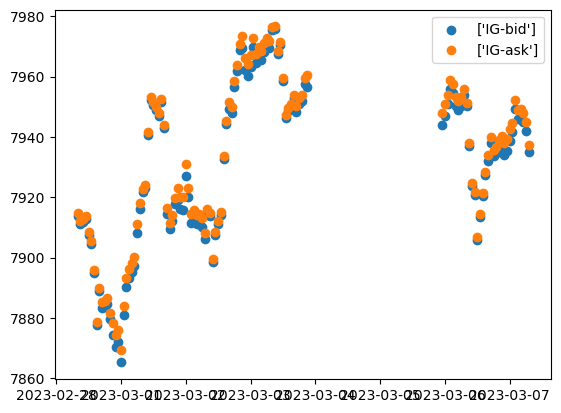

In [28]:
#plt.scatter(response_yf['^FTSE'].index,response_yf['^FTSE']['High'],label="YF")
plt.scatter(response_ig['prices'].index,response_ig['prices']['bid']['High'],label=['IG-bid'])
plt.scatter(response_ig['prices'].index,response_ig['prices']['ask']['High'],label=['IG-ask'])

plt.legend()

In [32]:
# find common indexes
idx = response_yf['^FTSE'].index.intersection(response_ig['prices'].index)
print(idx)

DatetimeIndex(['2023-02-28 08:00:00', '2023-02-28 09:00:00',
               '2023-02-28 10:00:00', '2023-02-28 11:00:00',
               '2023-02-28 12:00:00', '2023-02-28 13:00:00',
               '2023-02-28 14:00:00', '2023-02-28 15:00:00',
               '2023-02-28 16:00:00', '2023-03-01 08:00:00',
               '2023-03-01 09:00:00', '2023-03-01 10:00:00',
               '2023-03-01 11:00:00', '2023-03-01 12:00:00',
               '2023-03-01 13:00:00', '2023-03-01 14:00:00',
               '2023-03-01 15:00:00', '2023-03-01 16:00:00',
               '2023-03-02 08:00:00', '2023-03-02 09:00:00',
               '2023-03-02 10:00:00', '2023-03-02 11:00:00',
               '2023-03-02 12:00:00', '2023-03-02 13:00:00',
               '2023-03-02 14:00:00', '2023-03-02 15:00:00',
               '2023-03-02 16:00:00', '2023-03-03 08:00:00',
               '2023-03-03 09:00:00', '2023-03-03 10:00:00',
               '2023-03-03 11:00:00', '2023-03-03 12:00:00',
               '2023-03-

In [38]:
yfd=response_yf['^FTSE'].loc[idx]
igd=response_ig['prices'].loc[idx]

In [36]:
print(yfd['Open'])

2023-02-28 08:00:00    7935.109863
2023-02-28 09:00:00    7907.220215
2023-02-28 10:00:00    7900.049805
2023-02-28 11:00:00    7910.060059
2023-02-28 12:00:00    7896.459961
2023-02-28 13:00:00    7900.500000
2023-02-28 14:00:00    7897.009766
2023-02-28 15:00:00    7856.919922
2023-02-28 16:00:00    7877.120117
2023-03-01 08:00:00    7876.279785
2023-03-01 09:00:00    7911.109863
2023-03-01 10:00:00    7910.359863
2023-03-01 11:00:00    7936.669922
2023-03-01 12:00:00    7947.500000
2023-03-01 13:00:00    7946.899902
2023-03-01 14:00:00    7931.560059
2023-03-01 15:00:00    7943.959961
2023-03-01 16:00:00    7943.049805
2023-03-02 08:00:00    7914.930176
2023-03-02 09:00:00    7913.689941
2023-03-02 10:00:00    7890.720215
2023-03-02 11:00:00    7897.109863
2023-03-02 12:00:00    7902.229980
2023-03-02 13:00:00    7909.270020
2023-03-02 14:00:00    7905.209961
2023-03-02 15:00:00    7930.560059
2023-03-02 16:00:00    7942.930176
2023-03-03 08:00:00    7944.040039
2023-03-03 09:00:00 

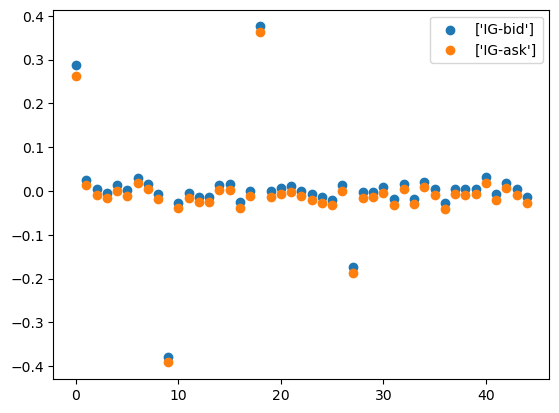

In [53]:
igd['IDX']=range(len(igd))
plt.scatter(igd['IDX'],100.*(yfd['Open']-igd['bid']['Open'])/yfd['Open'],label=['IG-bid'])
plt.scatter(igd['IDX'],100.*(yfd['Open']-igd['ask']['Open'])/yfd['Open'],label=['IG-ask'])
plt.legend()


In [56]:
igd[:2]

bid                             ask                  \
                       Open    High     Low   Close    Open    High     Low   
2023-02-28 08:00:00  7912.2  7913.7  7889.7  7904.7  7914.2  7914.7  7890.7   
2023-02-28 09:00:00  7905.2  7911.2  7883.2  7900.0  7906.2  7912.2  7884.2   

                            last                       IDX  
                      Close Open High Low Close Volume      
2023-02-28 08:00:00  7905.7  NaN  NaN NaN   NaN  13912   0  
2023-02-28 09:00:00  7901.0  NaN  NaN NaN   NaN   6760   1

In [57]:
yfd[:2]

,Open,High,Low,Close,Adj Close,Volume
2023-02-28 08:00:00,7935.109863,7935.109863,7892.790039,7907.189941,7907.189941,0
2023-02-28 09:00:00,7907.220215,7911.609863,7884.759766,7900.140137,7900.140137,0
